In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# navigate backwards one
os.chdir('..')

In [2]:
# set working directory to the directory of this notebook

# Read the data
df = pd.read_csv('convert_MCMF_ALL_TIME_DATA.csv', sep = '\t')
df.head()

/var/folders/78/287t_xwn4jj_fts7vlrhv3z80000gq/T/ipykernel_18147/3835827827.py:4: DtypeWarning: Columns (14,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('convert_MCMF_ALL_TIME_DATA.csv', sep = '\t')


,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art.,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"4,557",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money.,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


In [42]:
df.shape

(84878, 56)

In [3]:
print(df.shape)
df = df[df['Min Age'] <= 24]
print(df.shape)

(84878, 56)
(84585, 56)


In [44]:
df['Geographic Cluster Name'].value_counts()

IRVING PARK                    7276
NEAR WEST SIDE                 3437
MORGAN PARK                    3309
Bronzeville/South Lakefront    2802
PULLMAN                        2751
                               ... 
FULLER PARK                     177
HYDE PARK                       115
CALUMET HEIGHTS                  79
OHARE                             5
BURNSIDE                          2
Name: Geographic Cluster Name, Length: 79, dtype: int64

idea: combine price/transportation/food into an aggregate measure and overlay the geographic clusters onto a map to view the distributions

In [45]:
# check missing values
df.isnull().sum()

IndexRow                               0
Id                                     0
Logo Url                           79552
Program Name                           0
Description                            0
Org Name                               0
Category Name                          2
Capacity                            7122
Min Age                                0
Max Age                                0
Meeting Type                           0
Address                             8770
City                                6226
State                               6227
Zipcode                             8717
Online Address                     27359
Program Url                         1301
Registration Url                    8841
Registration Open                  82942
Registration Deadline              60400
Start Date                             0
End Date                               0
Start Time                         12105
End Time                           12116
Scheduled Mon   

In [4]:
# drop columns with lots of missing values
weekday_cols = ['Scheduled Mon', 'Scheduled Tues', 'Scheduled Wed', 'Scheduled Thurs', 'Scheduled Fri', 'Scheduled Sat', 'Scheduled Sun']
weekday_cols2 = ['Mon Start Time', 'Mon End Time', 'Tues Start Time', 'Tues End Time', 'Wed Start Time', 'Wed End Time', 'Thurs Start Time', 'Thurs End Time', 'Fri Start Time', 'Fri End Time', 'Sat Start Time', 'Sat End Time', 'Sun Start Time', 'Sun End Time']
irrelevant_cols = ['Logo Url', 'Capacity', 'Address', 'City', 'State', 'Zipcode', 'Online Address', 
         'Program Url', 'Registration Url', 'Registration Open', 'Registration Deadline', 
         'Start Time', 'End Time', 'Contact Name', 'Contact Email', 'Contact Phone']
filter = weekday_cols + weekday_cols2 + irrelevant_cols
mcmf_filtered = df.drop(filter, axis = 1)
mcmf_filtered.head()

,IndexRow,Id,Program Name,Description,Org Name,Category Name,Min Age,Max Age,Meeting Type,Start Date,End Date,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,7,15,face_to_face,1/1/20,12/31/20,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,7,15,face_to_face,1/1/20,12/31/20,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,12,18,face_to_face,1/1/20,12/31/20,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art.,12,18,face_to_face,1/1/20,12/31/20,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"4,557",78746,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money.,16,24,face_to_face,1/1/20,12/31/20,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


In [5]:
import datetime as dt
# convert Start Date and End Date to datetime
mcmf_filtered['Start Date'] = pd.to_datetime(mcmf_filtered['Start Date'])
mcmf_filtered['End Date'] = pd.to_datetime(mcmf_filtered['End Date'])
mcmf_filtered[['Start Date', 'End Date']].head()

,Start Date,End Date
0,2020-01-01,2020-12-31
1,2020-01-01,2020-12-31
2,2020-01-01,2020-12-31
3,2020-01-01,2020-12-31
4,2020-01-01,2020-12-31


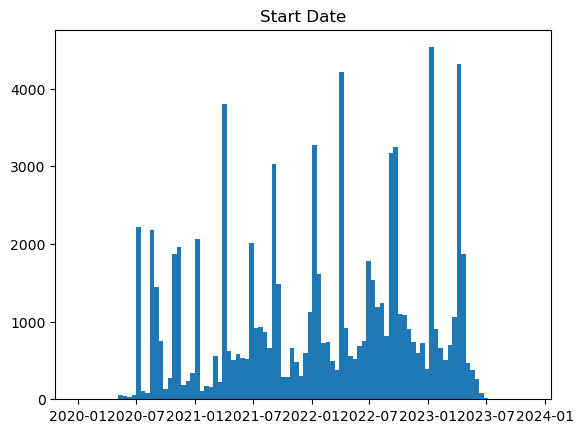

In [6]:
# plot the distribution of Start Date and End Date
plt.hist(mcmf_filtered['Start Date'], bins = 100)
plt.title('Start Date')
plt.show()

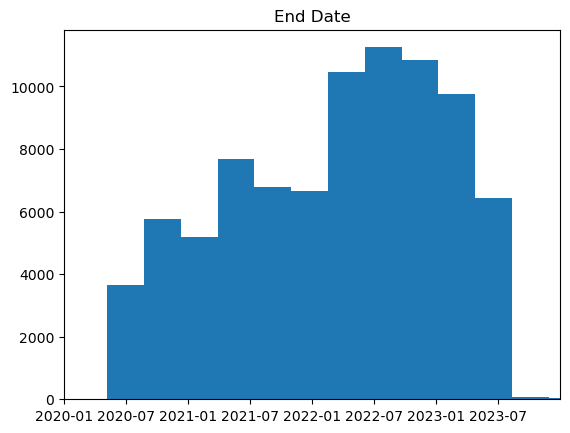

In [7]:
plt.hist(mcmf_filtered['End Date'], bins = 100)
plt.title('End Date')
plt.xlim([dt.date(2020, 1, 1), dt.date(2023, 12, 31)])
plt.show()

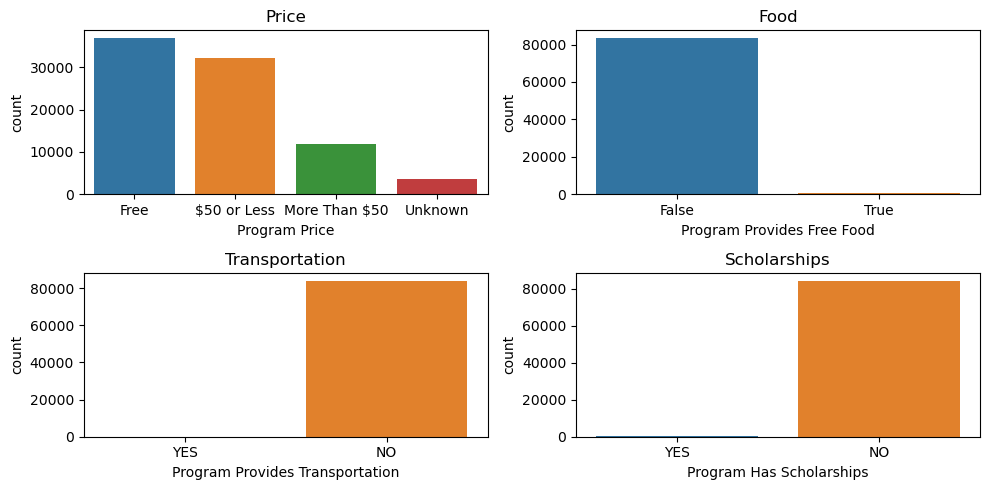

In [62]:
# barplots of price, food, transportation, scholarships
plt.figure(figsize = (10, 5))
plt.subplot(2, 2, 1)
sns.countplot(x = 'Program Price', data = mcmf_filtered)
plt.title('Price')

plt.subplot(2, 2, 2)
sns.countplot(x = 'Program Provides Free Food', data = mcmf_filtered)
plt.title('Food')

plt.subplot(2, 2, 3)
sns.countplot(x = 'Program Provides Transportation', data = mcmf_filtered)
plt.title('Transportation')

plt.subplot(2, 2, 4)
sns.countplot(x = 'Program Has Scholarships', data = mcmf_filtered)
plt.title('Scholarships')

# plt.subplot(3, 2, 5)
# sns.countplot(x = 'Program Pays Participants', data = mcmf_filtered)
# plt.title('Pays Participants')

plt.tight_layout()
plt.show()

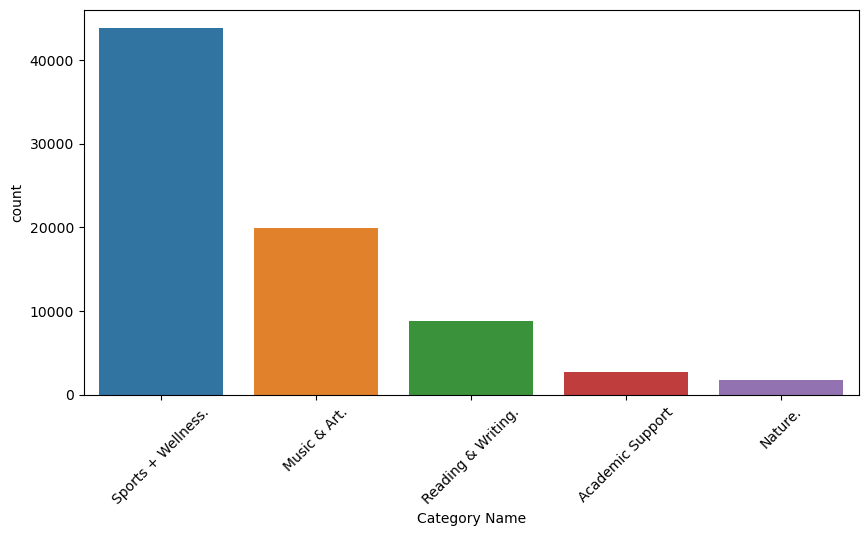

In [13]:
mcmf_filtered['Category Name'].value_counts()
# barplot of Category Name
plt.figure(figsize = (10, 5))
# sns.countplot(x = 'Category Name', data = mcmf_filtered, order = mcmf_filtered['Category Name'].value_counts().index)
# only first 5 categories
sns.countplot(x = 'Category Name', data = mcmf_filtered, order = mcmf_filtered['Category Name'].value_counts().index[:5])
plt.xticks(rotation = 45)
plt.show()


In [48]:
mcmf_filtered['Program Pays Participants'].value_counts()

Not Paid              83819
Paid, Type Unknown      390
Unknown_Code            376
Name: Program Pays Participants, dtype: int64

In [8]:
binary = ['Program Price', 'Program Pays Participants', 'Program Has Scholarships', 'Program Provides Transportation', 'Program Provides Free Food']
for col in binary:
    print(mcmf_filtered[col].value_counts())


Free             36917
$50 or Less      32318
More Than $50    11784
Unknown           3566
Name: Program Price, dtype: int64
Not Paid              83819
Paid, Type Unknown      390
Unknown_Code            376
Name: Program Pays Participants, dtype: int64
NO     84439
YES      146
Name: Program Has Scholarships, dtype: int64
NO     84090
YES       77
Name: Program Provides Transportation, dtype: int64
False    83418
True       548
Name: Program Provides Free Food, dtype: int64


In [14]:
mcmf_filtered['Meeting Type'].value_counts()

face_to_face    72913
online          11672
Name: Meeting Type, dtype: int64

Most programs are free or less than $50. Most are unpaid with no scholarships, and no transportation/food provided.

Remap the binary/cat cols to numerics with higher number indicating better access (ie. scholarships/transportation/food provided)

In [9]:
# map coluns to binary
cols = {'Program Pays Participants': ['Paid, Type Unknown', 'Not Paid'], 'Program Has Scholarships': ['YES', 'NO'], 'Program Provides Transportation': ['YES', 'NO'], 'Program Provides Free Food': [True, False]}
for col in cols:
    mcmf_filtered[col] = mcmf_filtered[col].map(dict(zip(cols[col], [1, 0])))
mcmf_filtered['Program Price'] = mcmf_filtered['Program Price'].map({'Free': 3, '$50 or Less': 2, 'More Than $50' : 1, 'Unknown': 0})
mcmf_filtered.head()

,IndexRow,Id,Program Name,Description,Org Name,Category Name,Min Age,Max Age,Meeting Type,Start Date,End Date,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,7,15,face_to_face,1/1/20,12/31/20,3,NEAR WEST SIDE,0.0,1,1.0,41.886002,-87.642403,0.0
1,"4,569",78752,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,7,15,face_to_face,1/1/20,12/31/20,3,NEAR WEST SIDE,0.0,1,1.0,41.886002,-87.642403,0.0
2,"4,562",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,12,18,face_to_face,1/1/20,12/31/20,3,NORTH LAWNDALE,0.0,0,0.0,41.864799,-87.724800,1.0
3,"4,563",78749,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art.,12,18,face_to_face,1/1/20,12/31/20,3,NORTH LAWNDALE,0.0,0,0.0,41.864799,-87.724800,1.0
4,"4,557",78746,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money.,16,24,face_to_face,1/1/20,12/31/20,3,NaN,0.0,1,1.0,NaN,NaN,0.0


0.0    83819
Name: Program Pays Participants, dtype: int64

In [10]:
# aggregate price, pays participants, has scholarships, provides transportation, provides free food
mcmf_filtered['Accessibility'] = mcmf_filtered[['Program Price', 'Program Pays Participants', 'Program Has Scholarships', 'Program Provides Transportation', 'Program Provides Free Food']].sum(axis = 1)
mcmf_filtered['Accessibility'].value_counts()

3.0    36421
2.0    32307
1.0    11717
0.0     3566
4.0      526
5.0       44
6.0        4
Name: Accessibility, dtype: int64

In [17]:
# get directory
os.getcwd()

'/Users/Albert/Dropbox/NU_2023_Spring/STAT 390'

In [25]:
commAreas = pd.read_csv('CommAreas.csv')
commAreas.head()
print(dict(commAreas['COMMUNITY'].value_counts()))

{'DOUGLAS': 1, 'SOUTH DEERING': 1, 'BRIGHTON PARK': 1, 'ARCHER HEIGHTS': 1, 'GARFIELD RIDGE': 1, 'HEGEWISCH': 1, 'RIVERDALE': 1, 'WEST PULLMAN': 1, 'EAST SIDE': 1, 'PULLMAN': 1, 'CHATHAM': 1, 'NORTH CENTER': 1, 'ROSELAND': 1, 'CALUMET HEIGHTS': 1, 'LAKE VIEW': 1, 'MCKINLEY PARK': 1, 'BURNSIDE': 1, 'SOUTH CHICAGO': 1, 'BRIDGEPORT': 1, 'NEW CITY': 1, 'WEST ELSDON': 1, 'GAGE PARK': 1, 'EDGEWATER': 1, 'OHARE': 1, 'MORGAN PARK': 1, 'MOUNT GREENWOOD': 1, 'WASHINGTON HEIGHTS': 1, 'BEVERLY': 1, 'AUBURN GRESHAM': 1, 'ASHBURN': 1, 'LINCOLN PARK': 1, 'GREATER GRAND CROSSING': 1, 'ENGLEWOOD': 1, 'WEST ENGLEWOOD': 1, 'CHICAGO LAWN': 1, 'WEST LAWN': 1, 'CLEARING': 1, 'AVALON PARK': 1, 'SOUTH SHORE': 1, 'OAKLAND': 1, 'JEFFERSON PARK': 1, 'MONTCLARE': 1, 'DUNNING': 1, 'IRVING PARK': 1, 'PORTAGE PARK': 1, 'ALBANY PARK': 1, 'NORTH PARK': 1, 'FOREST GLEN': 1, 'ROGERS PARK': 1, 'LOOP': 1, 'WOODLAWN': 1, 'HYDE PARK': 1, 'WASHINGTON PARK': 1, 'LINCOLN SQUARE': 1, 'KENWOOD': 1, 'GRAND BOULEVARD': 1, 'FULLER 

In [26]:
mcmf_filtered['Geographic Cluster Name'].value_counts()

IRVING PARK                    7276
NEAR WEST SIDE                 3437
MORGAN PARK                    3309
Bronzeville/South Lakefront    2802
PULLMAN                        2751
                               ... 
FULLER PARK                     177
HYDE PARK                       115
CALUMET HEIGHTS                  79
OHARE                             5
BURNSIDE                          2
Name: Geographic Cluster Name, Length: 79, dtype: int64

In [ ]:
%matplotlib inline
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = mcmf_filtered, hue = 'Geographic Cluster Name', legend = False)
plt.show()

Outlier detected, remove it.

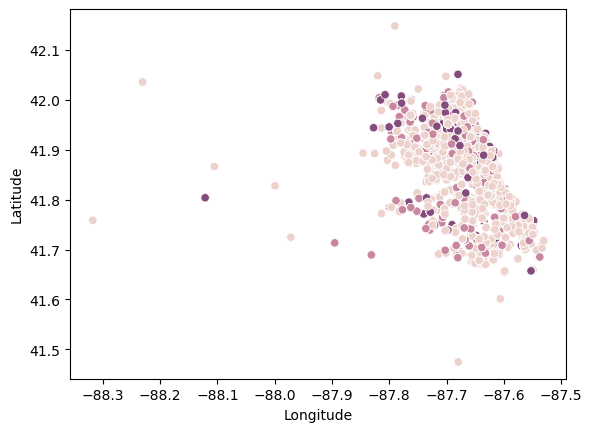

In [20]:
mcmf_filtered = mcmf_filtered[(mcmf_filtered['Longitude'] > -95) & (mcmf_filtered['Latitude'] > 41)]
sns.scatterplot(x = 'Longitude', y = 'Latitude', data = mcmf_filtered, hue = 'Program Price', legend = False)
plt.show()

In [21]:
mcmf_filtered.shape

(74872, 20)

<AxesSubplot:>

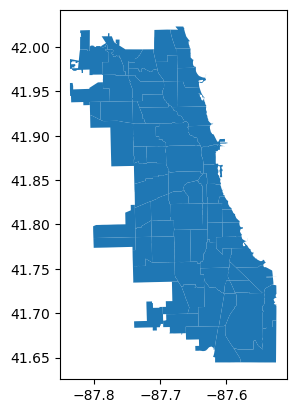

In [27]:
import geopandas as gpd
commAreas = gpd.read_file('Boundaries - Community Areas (current).geojson')
# remove Ohare
commAreas = commAreas[commAreas['community'] != 'OHARE']
commAreas.plot()

In [28]:
commAreas.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


In [29]:
area_freq = dict(mcmf_filtered['Geographic Cluster Name'].value_counts())
area_freq = pd.DataFrame.from_dict(area_freq, orient = 'index')
area_freq = area_freq.reset_index()
area_freq.columns = ['community', 'frequency']
area_freq['community'] = area_freq['community'].str.upper()
area_freq.head()

,community,frequency
0,IRVING PARK,7276
1,NEAR WEST SIDE,3437
2,MORGAN PARK,3309
3,BRONZEVILLE/SOUTH LAKEFRONT,2802
4,PULLMAN,2751


In [30]:
commAreas = commAreas.merge(area_freq, on = 'community')
commAreas.head()

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry,frequency
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",663
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",382
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",177
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",317
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",636


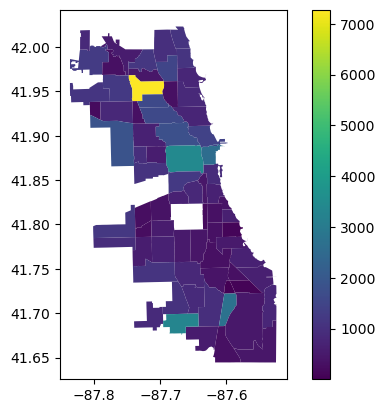

In [31]:
commAreas.plot(column = commAreas.frequency, legend = True)
# plt.legend()
plt.show()

In [32]:
accessibility = mcmf_filtered[['Geographic Cluster Name', 'Accessibility']]
accessibility = accessibility.groupby('Geographic Cluster Name').mean()
accessibility = accessibility.reset_index()
accessibility.head()

,Geographic Cluster Name,Accessibility
0,ALBANY PARK,2.220957
1,ARCHER HEIGHTS,2.155235
2,ARMOUR SQUARE,2.055556
3,ASHBURN,2.168044
4,AUBURN GRESHAM,2.527273


In [33]:
accessibility.rename(columns = {'Geographic Cluster Name': 'community'}, inplace = True)
commAreas = commAreas.merge(accessibility, on = 'community')

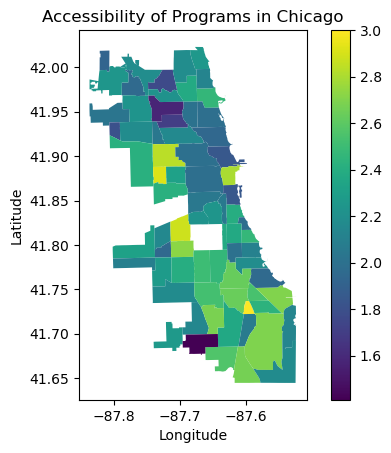

In [34]:
commAreas.plot(column = commAreas.Accessibility, legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accessibility of Programs in Chicago')
plt.show()

Morgan park stands out - why? Need to explore further.

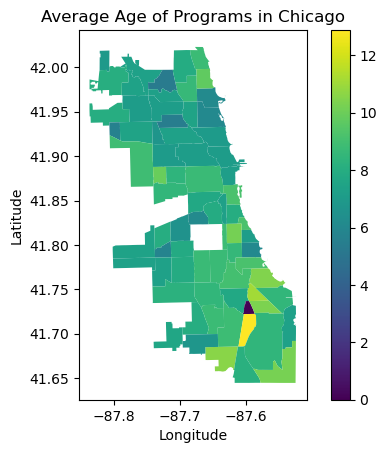

In [35]:
# get avg intended age of programs: max_age - min_age
mcmf_filtered['Avg Age'] = mcmf_filtered['Max Age'] - mcmf_filtered['Min Age']
age_df = mcmf_filtered[['Geographic Cluster Name', 'Min Age']]
age_df = age_df.groupby('Geographic Cluster Name').mean()
age_df = age_df.reset_index()
age_df.head()

age_df.rename(columns = {'Geographic Cluster Name': 'community'}, inplace = True)
commAreas = commAreas.merge(age_df, on = 'community')


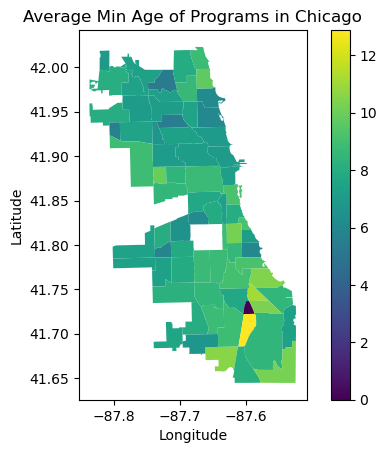

In [36]:
commAreas.plot(column = commAreas['Min Age'], legend = True)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Min Age of Programs in Chicago')
plt.show()

In [23]:
mcmf_filtered['Max Age'].value_counts().sort_index()

0       515
1        20
2       408
3      1684
4      2656
       ... 
100     110
110       1
120       1
171       1
200       1
Name: Max Age, Length: 63, dtype: int64